In [91]:
# Import necessary packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score

In [5]:
# Load the data set
file_path = "Obesity prediction.csv"
df = pd.read_csv(file_path)

In [6]:
# Display basic info
print("Dataset Overview:")
print(df.info())

Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Gender          2111 non-null   object 
 1   Age             2111 non-null   float64
 2   Height          2111 non-null   float64
 3   Weight          2111 non-null   float64
 4   family_history  2111 non-null   object 
 5   FAVC            2111 non-null   object 
 6   FCVC            2111 non-null   float64
 7   NCP             2111 non-null   float64
 8   CAEC            2111 non-null   object 
 9   SMOKE           2111 non-null   object 
 10  CH2O            2111 non-null   float64
 11  SCC             2111 non-null   object 
 12  FAF             2111 non-null   float64
 13  TUE             2111 non-null   float64
 14  CALC            2111 non-null   object 
 15  MTRANS          2111 non-null   object 
 16  Obesity         2111 non-null   object 
dtypes: float64(8), 

In [7]:
# Check for missing values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Gender            0
Age               0
Height            0
Weight            0
family_history    0
FAVC              0
FCVC              0
NCP               0
CAEC              0
SMOKE             0
CH2O              0
SCC               0
FAF               0
TUE               0
CALC              0
MTRANS            0
Obesity           0
dtype: int64


In [8]:
# Check for duplicate rows and remove them
df.drop_duplicates(inplace=True)

In [9]:
# Display summary statistics
print("\nSummary Statistics:")
print(df.describe())


Summary Statistics:
               Age       Height       Weight         FCVC          NCP  \
count  2087.000000  2087.000000  2087.000000  2087.000000  2087.000000   
mean     24.353090     1.702674    86.858730     2.421466     2.701179   
std       6.368801     0.093186    26.190847     0.534737     0.764614   
min      14.000000     1.450000    39.000000     1.000000     1.000000   
25%      19.915937     1.630178    66.000000     2.000000     2.697467   
50%      22.847618     1.701584    83.101100     2.396265     3.000000   
75%      26.000000     1.769491   108.015907     3.000000     3.000000   
max      61.000000     1.980000   173.000000     3.000000     4.000000   

              CH2O          FAF          TUE  
count  2087.000000  2087.000000  2087.000000  
mean      2.004749     1.012812     0.663035  
std       0.608284     0.853475     0.608153  
min       1.000000     0.000000     0.000000  
25%       1.590922     0.124505     0.000000  
50%       2.000000     1.00000

In [10]:
# Display the first few rows of the cleaned data set
df.head()

,Gender,Age,Height,Weight,family_history,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,Obesity
0,Female,21.0,1.62,64.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,0.0,1.0,no,Public_Transportation,Normal_Weight
1,Female,21.0,1.52,56.0,yes,no,3.0,3.0,Sometimes,yes,3.0,yes,3.0,0.0,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.0,1.80,77.0,yes,no,2.0,3.0,Sometimes,no,2.0,no,2.0,1.0,Frequently,Public_Transportation,Normal_Weight
3,Male,27.0,1.80,87.0,no,no,3.0,3.0,Sometimes,no,2.0,no,2.0,0.0,Frequently,Walking,Overweight_Level_I
4,Male,22.0,1.78,89.8,no,no,2.0,1.0,Sometimes,no,2.0,no,0.0,0.0,Sometimes,Public_Transportation,Overweight_Level_II


In [11]:
# Display the row and column count of the cleaned data set
df.shape

(2087, 17)

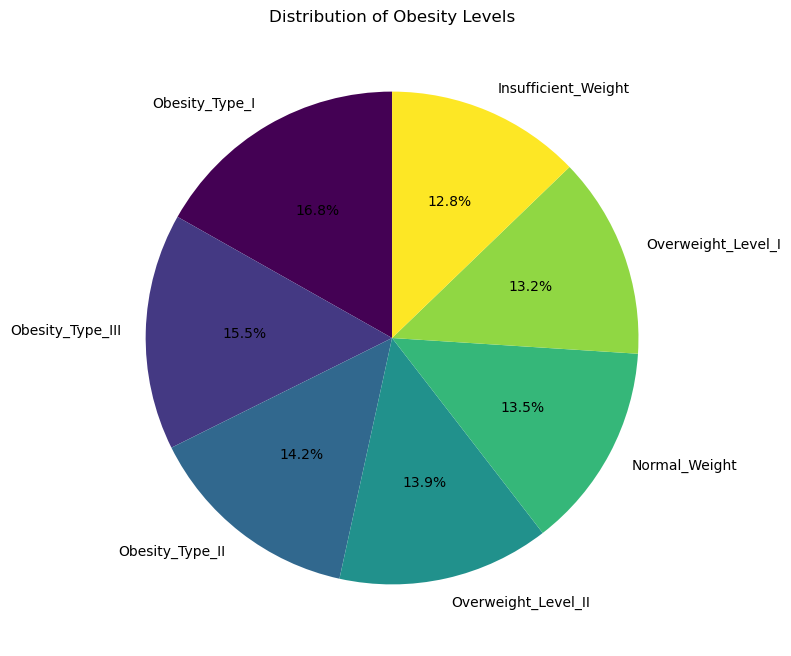

In [12]:
# Pie Chart: Distribution of Obesity Levels
plt.figure(figsize=(8, 8))
df["Obesity"].value_counts().plot.pie(autopct='%1.1f%%', cmap='viridis', startangle=90)
plt.ylabel("")
plt.title("Distribution of Obesity Levels")
plt.show()

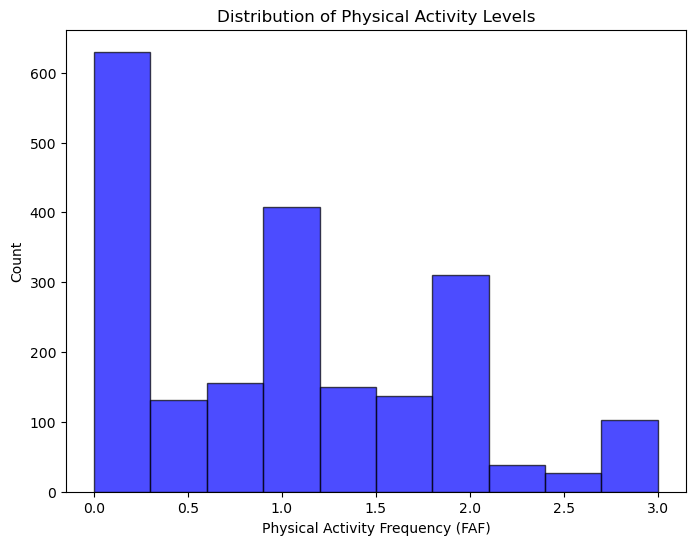

In [13]:
# Histogram: Physical Activity Frequency (FAF) Distribution
plt.figure(figsize=(8, 6))
plt.hist(df["FAF"], bins=10, color='blue', edgecolor='black', alpha=0.7)
plt.xlabel("Physical Activity Frequency (FAF)")
plt.ylabel("Count")
plt.title("Distribution of Physical Activity Levels")
plt.show()

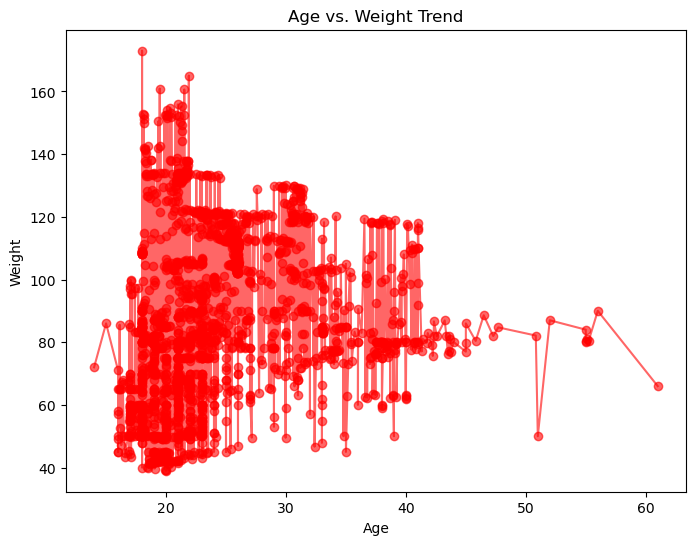

In [14]:
# Line Chart: Relationship Between Age and Weight
df_sorted = df.sort_values(by="Age")
plt.figure(figsize=(8, 6))
plt.plot(df_sorted["Age"], df_sorted["Weight"], marker='o', linestyle='-', color='red', alpha=0.6)
plt.xlabel("Age")
plt.ylabel("Weight")
plt.title("Age vs. Weight Trend")
plt.show()

In [34]:
# Encode categorical variables
label_encoders = {}
for col in df.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
    label_encoders[col] = le

In [36]:
# Define features and target variable
X = df.drop(columns=["Obesity"])  # Independent variables
y = df["Obesity"]  # Target variable

In [38]:
# Normalize numerical features (optional but recommended)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [40]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2)

In [42]:
# Train the Decision Tree classifier
clf = DecisionTreeClassifier(criterion="gini", max_depth=5)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=5)

In [44]:
# Make predictions
y_pred = clf.predict(X_test)

In [46]:
# Evaluate performance
DTree_accuracy = accuracy_score(y_test, y_pred)
DTree_precision = precision_score(y_test, y_pred, average='weighted')
DTree_recall = recall_score(y_test, y_pred, average='weighted')
DTree_f1 = f1_score(y_test, y_pred, average='weighted')

In [48]:
# Decision Tree Accuracy
print(DTree_accuracy)

0.8564593301435407


In [50]:
# Decision Tree Precision
print(DTree_precision)

0.8608987779239727


In [52]:
# Decision Tree Recall
print(DTree_recall)

0.8564593301435407


In [54]:
# Decision Tree f1
print(DTree_f1)

0.8533951870046932


In [56]:
# Get feature importance
feature_importances = clf.feature_importances_

In [58]:
# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

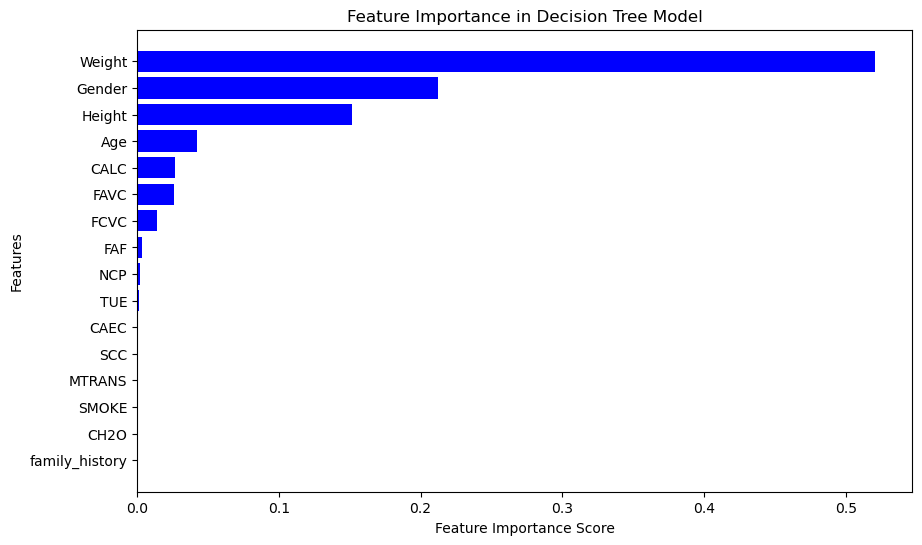

In [60]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Decision Tree Model")
plt.gca().invert_yaxis()
plt.show()

In [71]:
# Train the Random Forest classifier
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10)
rf_clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=10)

In [73]:
# Make predictions
y_pred_rf = rf_clf.predict(X_test)

In [75]:
# Evaluate performance
rf_accuracy = accuracy_score(y_test, y_pred_rf)
rf_precision = precision_score(y_test, y_pred_rf, average='weighted')
rf_recall = recall_score(y_test, y_pred_rf, average='weighted')
rf_f1 = f1_score(y_test, y_pred_rf, average='weighted')

In [77]:
# Random Forest Accuracy
print(rf_accuracy)

0.9473684210526315


In [79]:
# Random Forest Precision
print(rf_precision)

0.9506867100191008


In [81]:
# Random Forest Recall
print(rf_recall)

0.9473684210526315


In [83]:
# Random Forest f1
print(rf_f1)

0.9482043381627503


In [85]:
# Get feature importance
feature_importances = rf_clf.feature_importances_

In [87]:
# Sort features by importance
sorted_idx = np.argsort(feature_importances)[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_importances = feature_importances[sorted_idx]

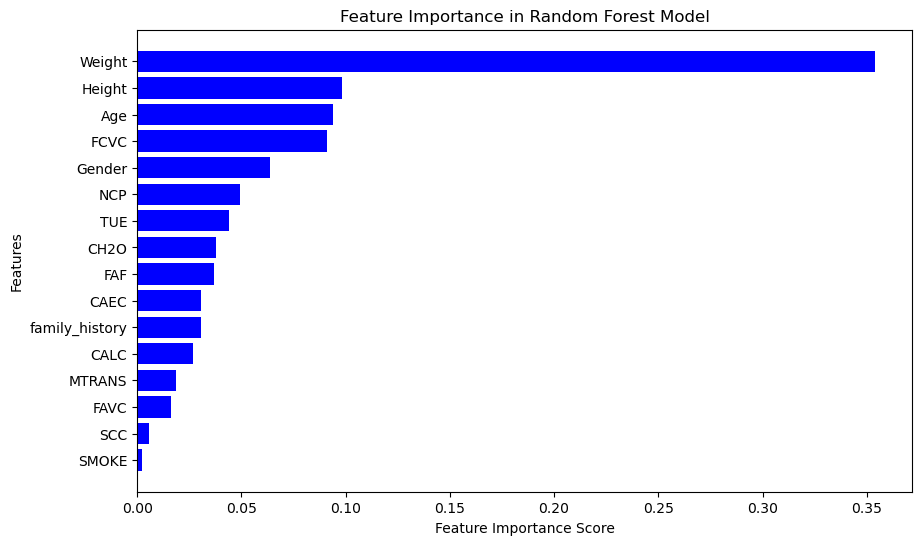

In [89]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='blue')
plt.xlabel("Feature Importance Score")
plt.ylabel("Features")
plt.title("Feature Importance in Random Forest Model")
plt.gca().invert_yaxis()
plt.show()

In [93]:
# Train the Naive Bayes classifier
nb_clf = GaussianNB()
nb_clf.fit(X_train, y_train)

GaussianNB()

In [95]:
# Make predictions
y_pred_nb = nb_clf.predict(X_test)

In [97]:
# Evaluate performance
nb_accuracy = accuracy_score(y_test, y_pred_nb)
nb_precision = precision_score(y_test, y_pred_nb, average='weighted')
nb_recall = recall_score(y_test, y_pred_nb, average='weighted')
nb_f1 = f1_score(y_test, y_pred_nb, average='weighted')

In [99]:
# Naive Bayes Accuracy
print(nb_accuracy)

0.5191387559808612


In [101]:
# Naive Bayes Precision
print(nb_precision)

0.502983500925381


In [103]:
# Naive Bayes Recall
print(nb_recall)

0.5191387559808612


In [105]:
# Naive Bayes f1
print(nb_f1)

0.4450896013703977


In [109]:
# Compute feature importance using absolute log probabilities
feature_importance = np.abs(nb_clf.theta_).mean(axis=0)

In [111]:
# Sort features by importance
sorted_idx = np.argsort(feature_importance)[::-1]
sorted_features = [X.columns[i] for i in sorted_idx]
sorted_importances = feature_importance[sorted_idx]

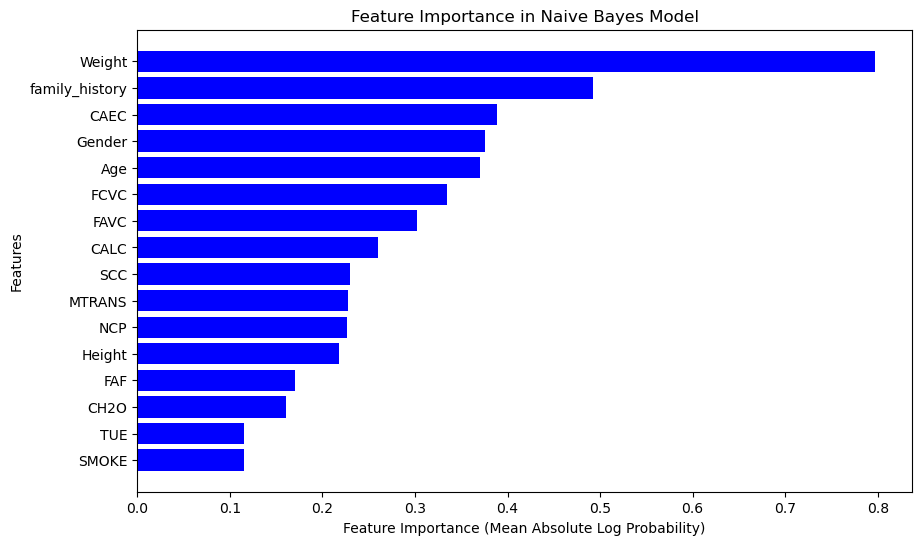

In [113]:
# Plot feature importance
plt.figure(figsize=(10, 6))
plt.barh(sorted_features, sorted_importances, color='blue')
plt.xlabel("Feature Importance (Mean Absolute Log Probability)")
plt.ylabel("Features")
plt.title("Feature Importance in Naive Bayes Model")
plt.gca().invert_yaxis()
plt.show()